In [26]:
source('seurat_helpers.R')

In [ ]:
adrenal_whole = new.env()
adrenal_whole$SR = readRDS('../data/Seurat/adrenal.human.seurat.rds')

# Mesenchyme, adrenal cortex, kidney

In [259]:
env_mesenchyme_cortex_kidney = new.env()
env_mesenchyme_cortex_kidney$SR =  adrenal_whole$SR[,adrenal_whole$SR@meta.data$seurat_clusters %in% c(11,31,22,17,38,20,33,27,14,4,24,0,7,28)]

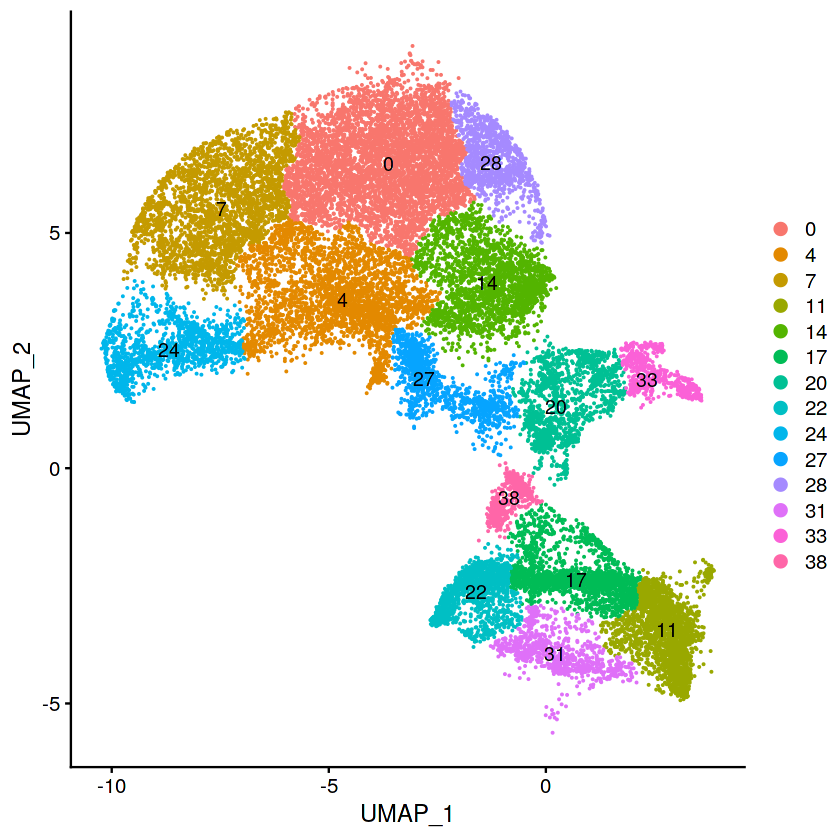

In [39]:
plot(DimPlot(env_mesenchyme_cortex_kidney$SR, algorithm=2, reduction = "umap", label=T))


When using repel, set xnudge and ynudge to 0 for optimal results
Warning message:
“Transformation introduced infinite values in continuous x-axis”Regressing out nFeature_RNA, percent.mt
Centering and scaling data matrix


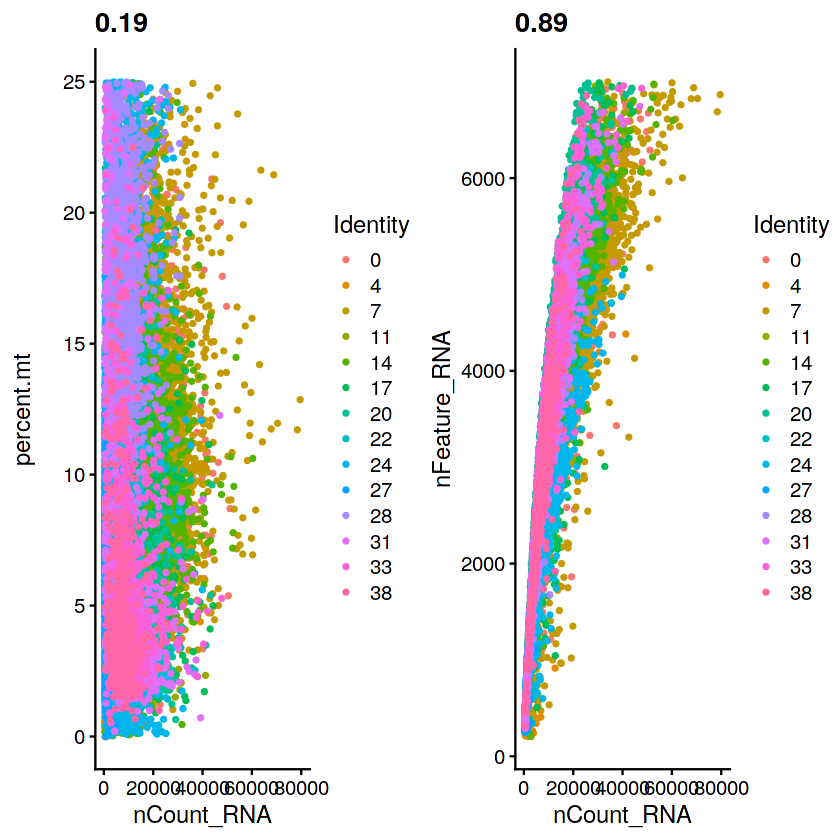

PC_ 1 
Positive:  COL1A1, COL3A1, COL1A2, COL6A2, VIM, COL5A2, GPC3, FN1, CALD1, CXCL12 
	   COL5A1, LGALS1, PLAC9, FBN1, COL12A1, PCOLCE, AKAP12, AHNAK, SEPT11, CDH11 
	   IGFBP5, CD81, COL6A1, COL6A3, FZD1, NID1, ISLR, FBLN1, NR2F2, POSTN 
Negative:  STAR, SNCG, FDX1, HSPD1, HSPE1, PTS, CYP11A1, MT3, APOE, PEG10 
	   MGARP, MT2A, INHA, GSTA4, APOA1, DHCR24, POR, COX17, FAM166B, PLP2 
	   TNNI3, PEBP1, MGST1, DLK1, APOC1, SULT2A1, KLHDC8B, CYP17A1, MGST2, SCARB1 
PC_ 2 
Positive:  DLK1, SPARC, MEG3, STAR, SH3BP5, DCN, C7, MYL9, PLAC9, SNCG 
	   OGN, APOE, FDX1, C11orf96, RPS4Y1, CYP11A1, COL1A2, COL3A1, INHA, FAM166B 
	   COL1A1, KLHDC8B, COL12A1, LGALS1, APOC1, LRRC17, CYP17A1, CPE, COL14A1, MGARP 
Negative:  CD24, PAX2, HMGA1, PAX8, DCDC2, LHX1, EMX2, CCDC198, CLDN3, WFDC2 
	   HOXA10, HNF1B, ARL4C, BMP7, ID4, POU3F3, SALL1, HOXA9, LAMA1, HOXB6 
	   SPINT1, CXXC5, KRT19, HMGB2, KIF12, TUBB2B, BCAM, SOX11, ERBB4, VAV3 
PC_ 3 
Positive:  CCDC198, DCDC2, CLDN3, CD24, HNF1B, EMX2, KCNJ1

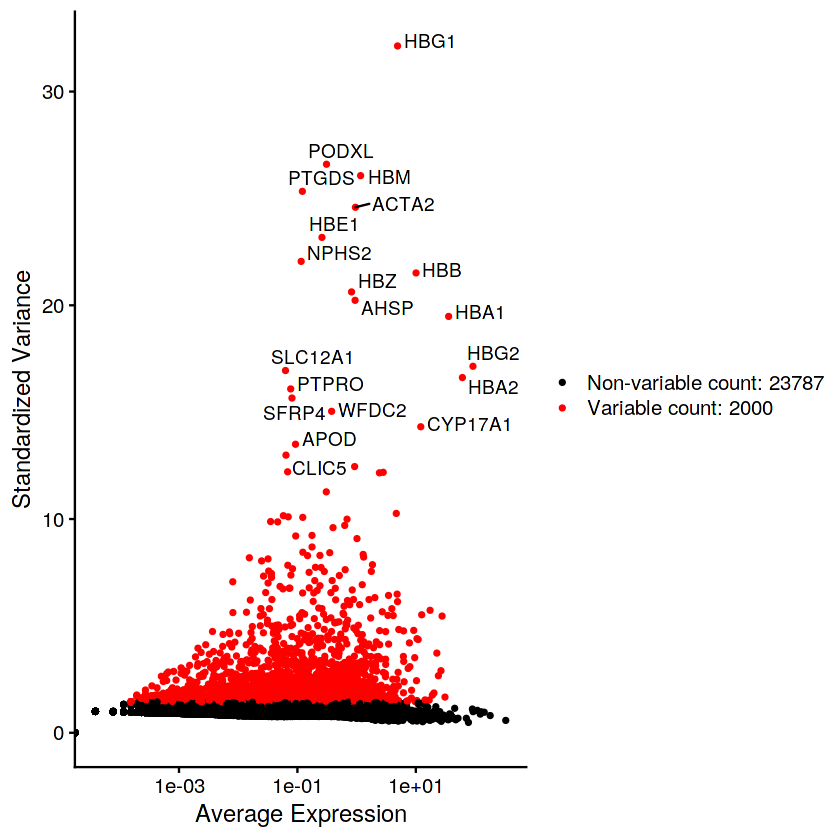

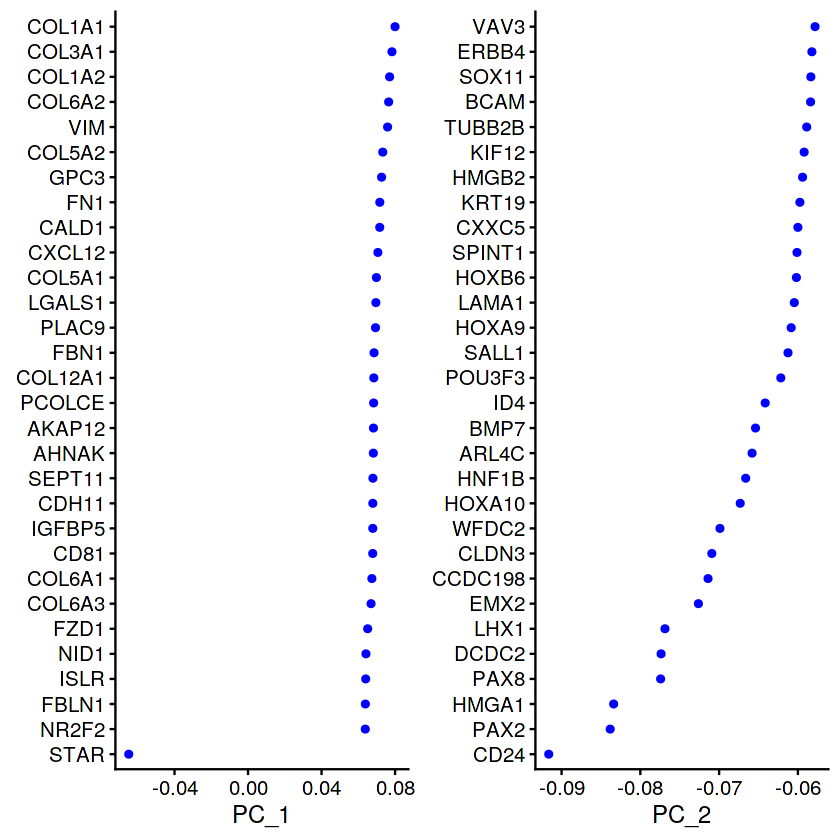

Computing nearest neighbor graph
Computing SNN


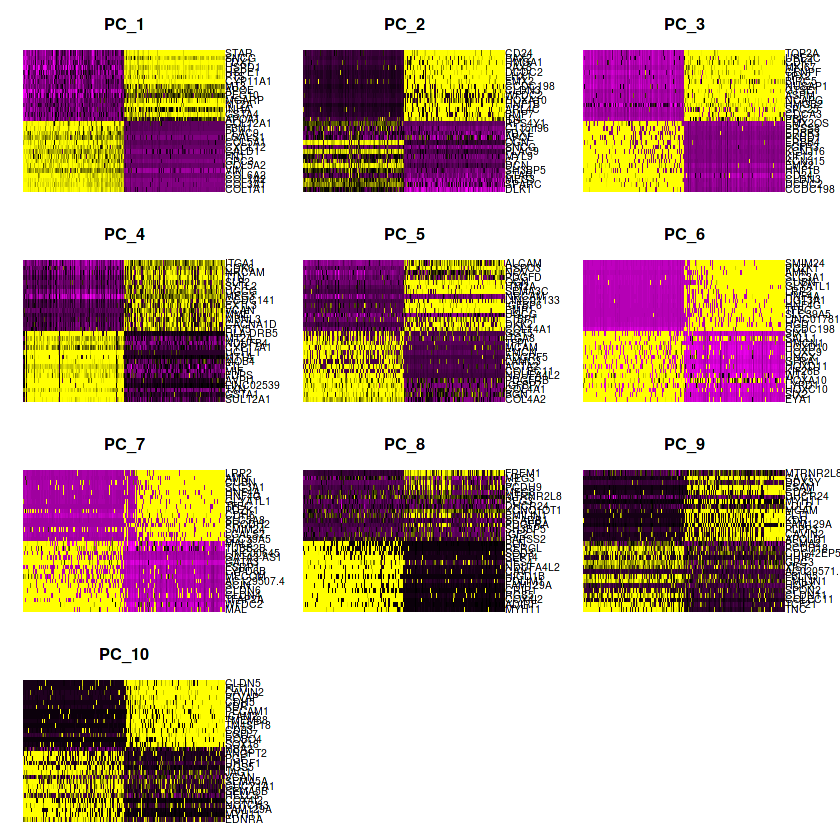

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25810
Number of edges: 790449

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9118
Number of communities: 18
Elapsed time: 3 seconds


Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in DoHeatmap(SR, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: MEIS2, RPS27L, LENG8, SNHG25, TBX3, MT-ATP6, MT-ND1, MT-CO3, MT-ND4, MT-CO1, COMT, MRPL33”

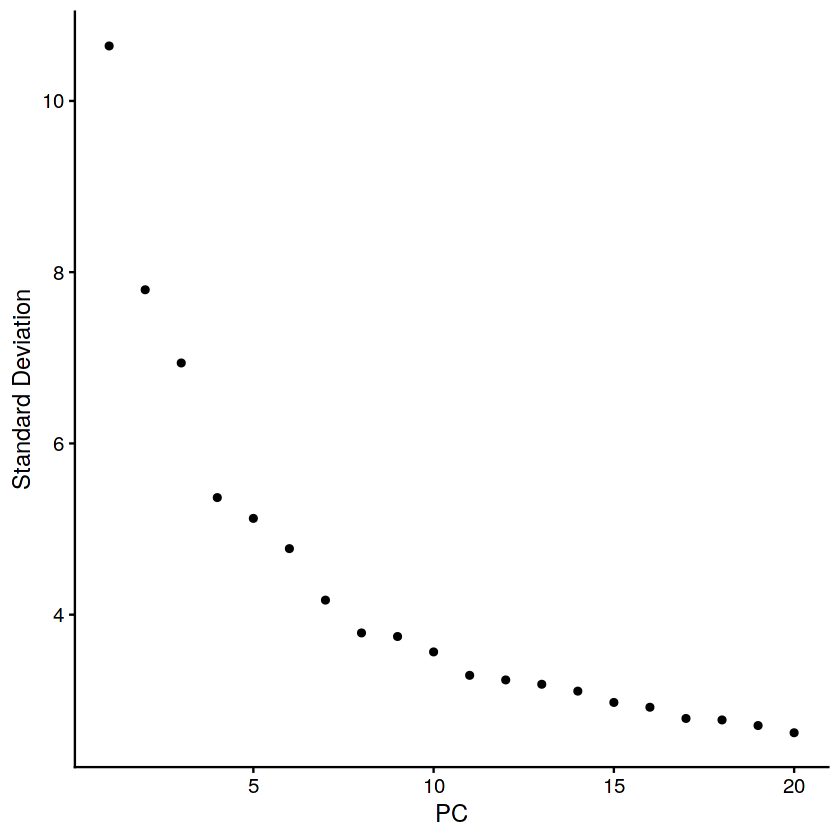

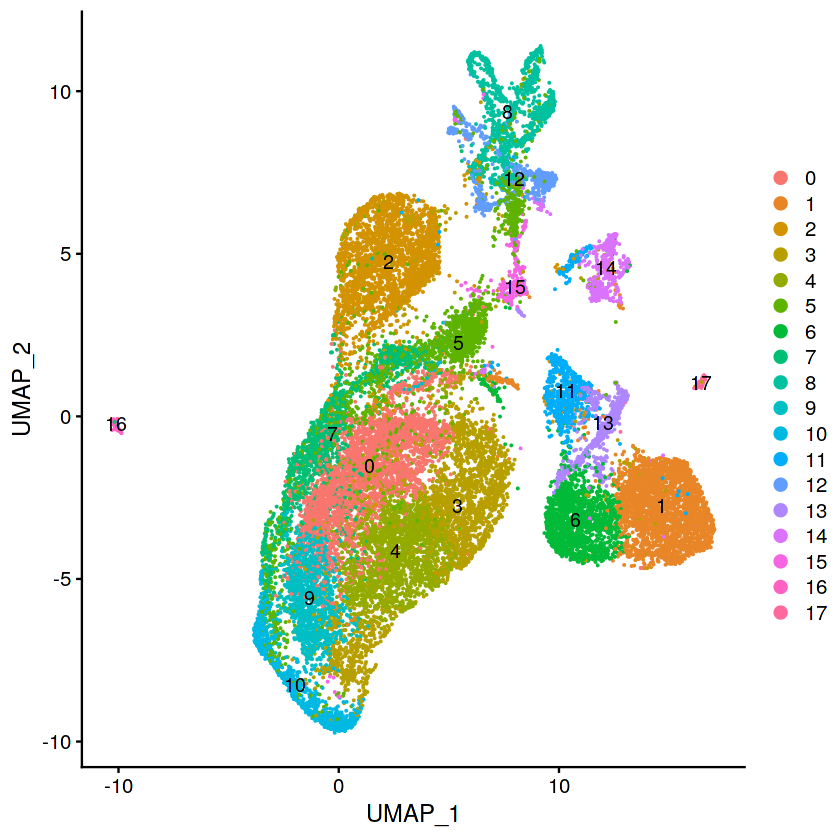

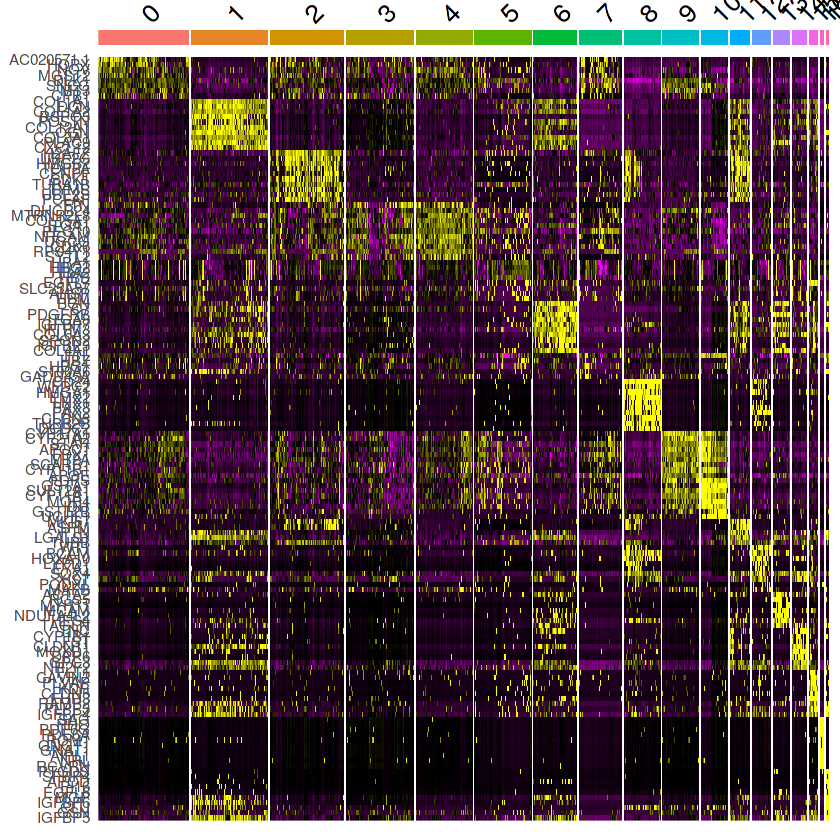

In [46]:
do_seurat_regress(env_mesenchyme_cortex_kidney)

In [26]:
dir.create('figures/fig3_cortex/')
markers_txt = 'Lyve1
Egfl7
Cldn5
Sox18
Kdr
Cyp26b1
Flt1
Cavin2
Wt1
Foxd1
Cldn5
Podxl
Mafb
Mki67
Pax8
Pax2
Emx2
Bmp7
Cldn4
Krt19
Rdh10
Gata3
Mal
Pou3f3
Meis1
Meis2
Nr2f1
Nr2f2
Robo1
Robo2
Ncam1
Erbb2
Erbb3
Erbb4
Pdzk1
Lrp2
Smim24
Fgfr3
Spp1
Epha7
Gpx3
Dpp4
'

markers_fig1 = toupper(strsplit(markers_txt, '\n')[[1]])
markers_fig1

for(marker in markers_fig1){
    print(marker)
    FeaturePlot(env_mesenchyme_cortex_kidney$SR, feature=marker, cols = c("lightgrey", "darkred")) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig3_cortex/004.cortex_no_recluster.marker.',marker,'.png'), width=5, height=5, dpi=320)
}

Warning message in dir.create("figures/fig3_cortex/"):
“'figures/fig3_cortex' already exists”

[1] "LYVE1"   "EGFL7"   "CLDN5"   "SOX18"   "KDR"     "CYP26B1" "FLT1"   
 [8] "CAVIN2"  "WT1"     "FOXD1"   "CLDN5"   "PODXL"   "MAFB"    "MKI67"  
[15] "PAX8"    "PAX2"    "EMX2"    "BMP7"    "CLDN4"   "KRT19"   "RDH10"  
[22] "GATA3"   "MAL"     "POU3F3"  "MEIS1"   "MEIS2"   "NR2F1"   "NR2F2"  
[29] "ROBO1"   "ROBO2"   "NCAM1"   "ERBB2"   "ERBB3"   "ERBB4"   "PDZK1"  
[36] "LRP2"    "SMIM24"  "FGFR3"   "SPP1"    "EPHA7"   "GPX3"    "DPP4"

[1] "LYVE1"
[1] "EGFL7"
[1] "CLDN5"
[1] "SOX18"
[1] "KDR"
[1] "CYP26B1"
[1] "FLT1"
[1] "CAVIN2"
[1] "WT1"
[1] "FOXD1"
[1] "CLDN5"
[1] "PODXL"
[1] "MAFB"
[1] "MKI67"
[1] "PAX8"
[1] "PAX2"
[1] "EMX2"
[1] "BMP7"
[1] "CLDN4"
[1] "KRT19"
[1] "RDH10"
[1] "GATA3"
[1] "MAL"
[1] "POU3F3"
[1] "MEIS1"
[1] "MEIS2"
[1] "NR2F1"
[1] "NR2F2"
[1] "ROBO1"
[1] "ROBO2"
[1] "NCAM1"
[1] "ERBB2"
[1] "ERBB3"
[1] "ERBB4"
[1] "PDZK1"
[1] "LRP2"
[1] "SMIM24"
[1] "FGFR3"
[1] "SPP1"
[1] "EPHA7"
[1] "GPX3"
[1] "DPP4"


In [44]:
dir.create('figures/fig3_cortex/')
markers_txt = 'Lyve1
Egfl7
Cldn5
Sox18
Kdr
Cyp26b1
Flt1
Cavin2
Wt1
Foxd1
Cldn5
Podxl
Mafb
Mki67
Pax8
Pax2
Emx2
Bmp7
Cldn4
Krt19
Rdh10
Gata3
Mal
Pou3f3
Meis1
Meis2
Nr2f1
Nr2f2
Robo1
Robo2
Ncam1
Erbb2
Erbb3
Erbb4
Pdzk1
Lrp2
Smim24
Fgfr3
Spp1
Epha7
Gpx3
Dpp4
Nr5a1
Fdx1
Star
Nov
Cyp11a1
Ldlr
Sult2a1
Cyb5a
Cyp17a1
Cyp21a2
Cyp11b1
Hsd3b2
Cyp17a1
Cyp11b2
Cyp21a2
Cyp11b1
Hsd3b2
EYA1
SIX2
IRX2
IRX3
PBX2
LHX1
KRT8
SOX9'

markers_fig1 = toupper(strsplit(markers_txt, '\n')[[1]])
markers_fig1

for(marker in markers_fig1){
    print(marker)
    FeaturePlot(env_mesenchyme_cortex_kidney$SR, feature=marker, cols = c("lightgrey", "darkred")) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig3_cortex/004.cortex_recluster_hb.marker.',marker,'.png'), width=5, height=5, dpi=320)
}

Warning message in dir.create("figures/fig3_cortex/"):
“'figures/fig3_cortex' already exists”

[1] "LYVE1"   "EGFL7"   "CLDN5"   "SOX18"   "KDR"     "CYP26B1" "FLT1"   
 [8] "CAVIN2"  "WT1"     "FOXD1"   "CLDN5"   "PODXL"   "MAFB"    "MKI67"  
[15] "PAX8"    "PAX2"    "EMX2"    "BMP7"    "CLDN4"   "KRT19"   "RDH10"  
[22] "GATA3"   "MAL"     "POU3F3"  "MEIS1"   "MEIS2"   "NR2F1"   "NR2F2"  
[29] "ROBO1"   "ROBO2"   "NCAM1"   "ERBB2"   "ERBB3"   "ERBB4"   "PDZK1"  
[36] "LRP2"    "SMIM24"  "FGFR3"   "SPP1"    "EPHA7"   "GPX3"    "DPP4"   
[43] "NR5A1"   "FDX1"    "STAR"    "NOV"     "CYP11A1" "LDLR"    "SULT2A1"
[50] "CYB5A"   "CYP17A1" "CYP21A2" "CYP11B1" "HSD3B2"  "CYP17A1" "CYP11B2"
[57] "CYP21A2" "CYP11B1" "HSD3B2"  "EYA1"    "SIX2"    "IRX2"    "IRX3"   
[64] "PBX2"    "LHX1"    "KRT8"    "SOX9"

[1] "LYVE1"
[1] "EGFL7"
[1] "CLDN5"
[1] "SOX18"
[1] "KDR"
[1] "CYP26B1"
[1] "FLT1"
[1] "CAVIN2"
[1] "WT1"
[1] "FOXD1"
[1] "CLDN5"
[1] "PODXL"
[1] "MAFB"
[1] "MKI67"
[1] "PAX8"
[1] "PAX2"
[1] "EMX2"
[1] "BMP7"
[1] "CLDN4"
[1] "KRT19"
[1] "RDH10"
[1] "GATA3"
[1] "MAL"
[1] "POU3F3"
[1] "MEIS1"
[1] "MEIS2"
[1] "NR2F1"
[1] "NR2F2"
[1] "ROBO1"
[1] "ROBO2"
[1] "NCAM1"
[1] "ERBB2"
[1] "ERBB3"
[1] "ERBB4"
[1] "PDZK1"
[1] "LRP2"
[1] "SMIM24"
[1] "FGFR3"
[1] "SPP1"
[1] "EPHA7"
[1] "GPX3"
[1] "DPP4"
[1] "NR5A1"
[1] "FDX1"
[1] "STAR"
[1] "NOV"
[1] "CYP11A1"
[1] "LDLR"
[1] "SULT2A1"
[1] "CYB5A"
[1] "CYP17A1"
[1] "CYP21A2"
[1] "CYP11B1"
[1] "HSD3B2"
[1] "CYP17A1"
[1] "CYP11B2"
[1] "CYP21A2"
[1] "CYP11B1"
[1] "HSD3B2"
[1] "EYA1"
[1] "SIX2"
[1] "IRX2"
[1] "IRX3"
[1] "PBX2"
[1] "LHX1"
[1] "KRT8"
[1] "SOX9"


# Endothelium

In [18]:
dir.create('figures/fig5_endothelium')

In [ ]:
env_endothelium = new.env()
env_endothelium$SR = adrenal_whole$SR[,adrenal_whole$SR@meta.data$fate=='endothelium']


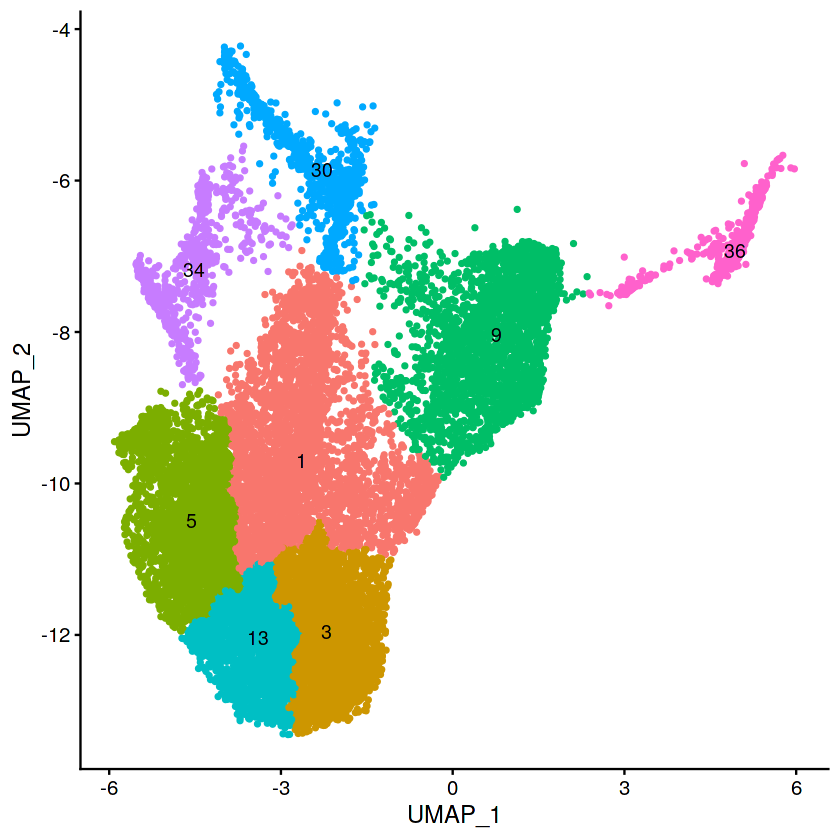

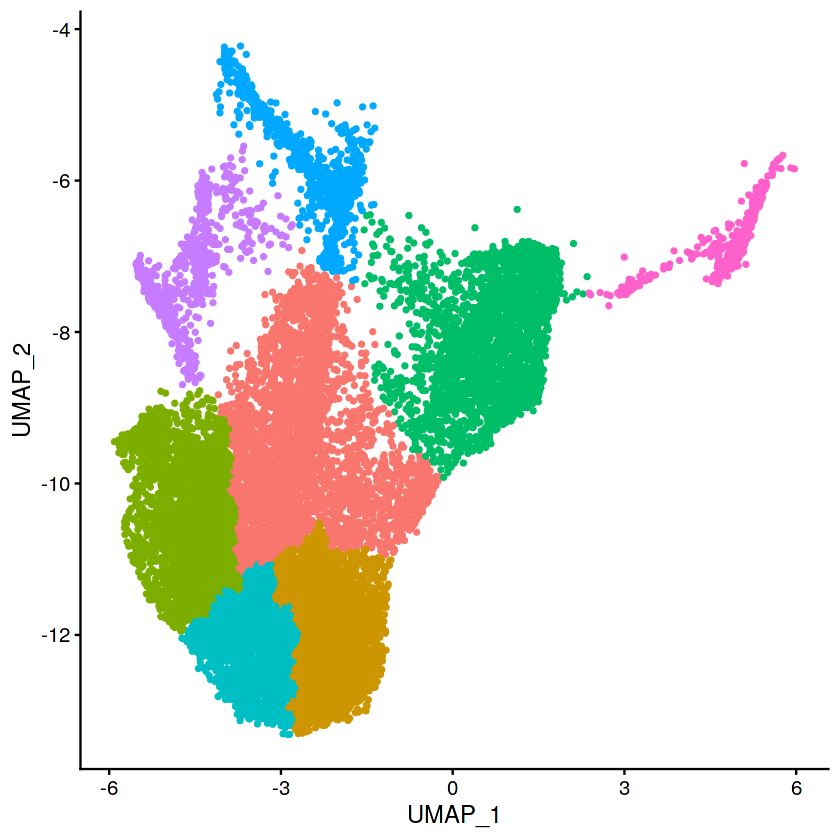

In [23]:
DimPlot(env_endothelium$SR, group.by='seurat_clusters', pt.size = 1, label = T)+NoLegend()
ggsave('figures/fig5_endothelium/007.endothelium.clusters_labelled.pt1.5x5.square.png', width=5, height=5, dpi=320)
DimPlot(env_endothelium$SR, group.by='seurat_clusters', pt.size = 1, label = F)+NoLegend()
ggsave('figures/fig5_endothelium/007.endothelium.clusters_unlabelled.pt1.5x5.square.png', width=5, height=5, dpi=320)

In [ ]:
do_seurat_regress(env_endothelium)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16778
Number of edges: 479357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8759
Number of communities: 12
Elapsed time: 2 seconds


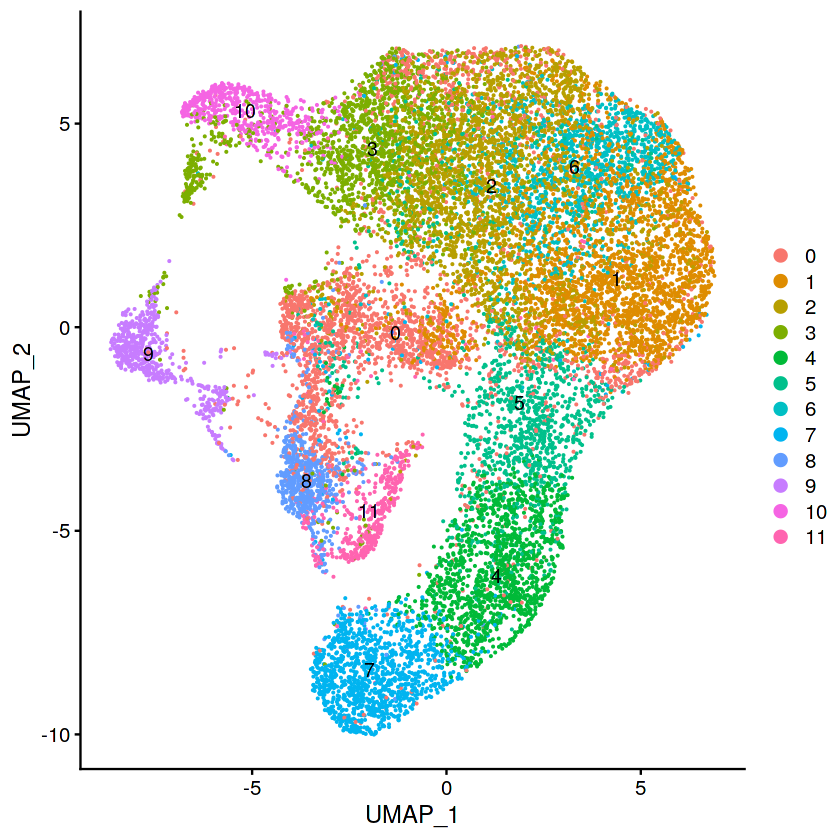

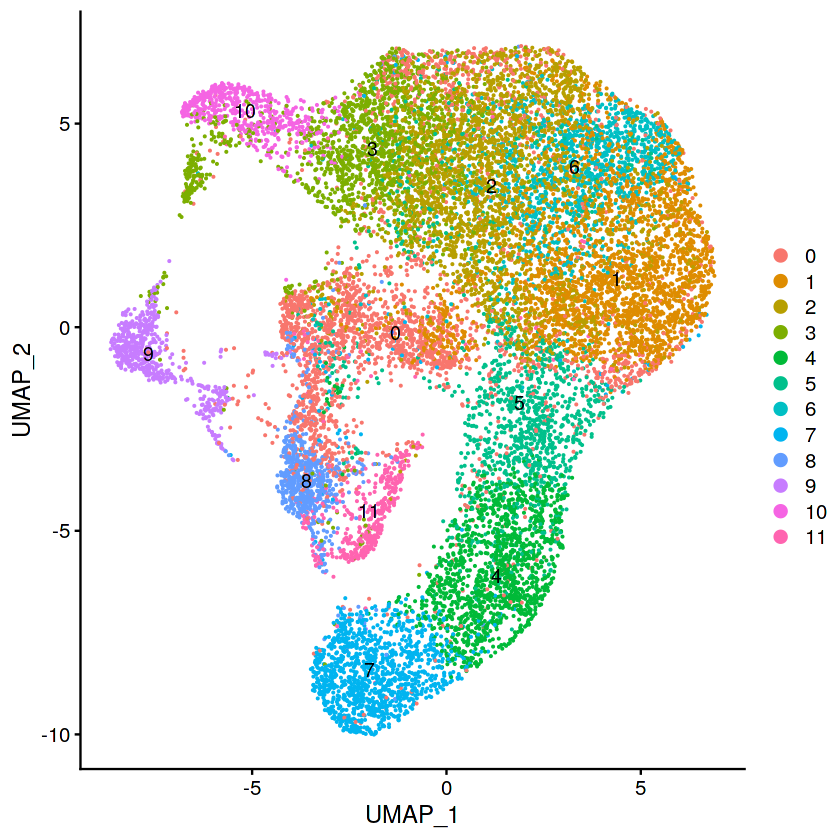

In [29]:
with(env_endothelium, {
    SR <- FindNeighbors(SR, dims = 1:5)
    SR <- FindClusters(SR, resolution = 0.5)

    SR <- RunUMAP(SR, dims = 1:8)
    plot(DimPlot(SR, reduction = "umap", label=T))

})

In [28]:
markers1 = toupper(c('PECAM1', 'FLT1', 'CAVIN2', 'PLPP3', 'RAMP2', 'CD24', 'CLDN5', 'Kdr', 'IGFBP1', 'IGFBP2', 'GNG11',  'PLVAP', 'CDH5'))
#'BM2',

for(marker in markers1){
    print(marker)
    FeaturePlot(env_endothelium$SR, feature=marker, cols = c("lightgrey", "darkred"), pt.size = 1) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig5_endothelium/004.endothelium.marker.',marker,'.png'), width=5, height=5, dpi=320)
}

[1] "PECAM1"
[1] "FLT1"
[1] "CAVIN2"
[1] "PLPP3"
[1] "RAMP2"
[1] "CD24"
[1] "CLDN5"
[1] "KDR"
[1] "IGFBP1"
[1] "IGFBP2"
[1] "GNG11"
[1] "PLVAP"
[1] "CDH5"


In [15]:
dir.create('figures/fig5_endothelium/reclustered')
markers_txt = 'CXCR4
EFNB2
GJA4
GJA5
MSX1
UNC5B
MKI67
PCNA
ADGRG6
ANXA1
DUSP23
HAPLN3
ACTN1
CCL21
LYVE1
PGM5
PROX1
ACKR3
ACP5
AFP
GATA4
STAB2
B2M
MYL12A
APLNR
EPHB4
NR2F2
TEK
'

markers_fig1 = toupper(strsplit(markers_txt, '\n')[[1]])
markers_fig1

for(marker in markers_fig1){
    print(marker)
    tryCatch({
    FeaturePlot(env_endothelium$SR, feature=marker, cols = c("lightgrey", "darkred")) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig5_endothelium/reclustered/004.endothelium_recluster.marker.',marker,'.png'), width=5, height=5, dpi=320)
    },
            error=function(e){print('not found')})
}

Warning message in dir.create("figures/fig5_endothelium/reclustered"):
“'figures/fig5_endothelium/reclustered' already exists”

[1] "CXCR4"  "EFNB2"  "GJA4"   "GJA5"   "MSX1"   "UNC5B"  "MKI67"  "PCNA"  
 [9] "ADGRG6" "ANXA1"  "DUSP23" "HAPLN3" "ACTN1"  "CCL21"  "LYVE1"  "PGM5"  
[17] "PROX1"  "ACKR3"  "ACP5"   "AFP"    "GATA4"  "STAB2"  "B2M"    "MYL12A"
[25] "APLNR"  "EPHB4"  "NR2F2"  "TEK"

[1] "CXCR4"
[1] "EFNB2"
[1] "GJA4"
[1] "GJA5"
[1] "MSX1"
[1] "UNC5B"
[1] "MKI67"
[1] "PCNA"
[1] "ADGRG6"
[1] "ANXA1"
[1] "DUSP23"
[1] "HAPLN3"
[1] "ACTN1"
[1] "CCL21"
[1] "LYVE1"
[1] "PGM5"
[1] "PROX1"
[1] "ACKR3"
[1] "ACP5"
[1] "AFP"
[1] "GATA4"
[1] "STAB2"
[1] "B2M"
[1] "MYL12A"
[1] "APLNR"
[1] "EPHB4"
[1] "NR2F2"
[1] "TEK"


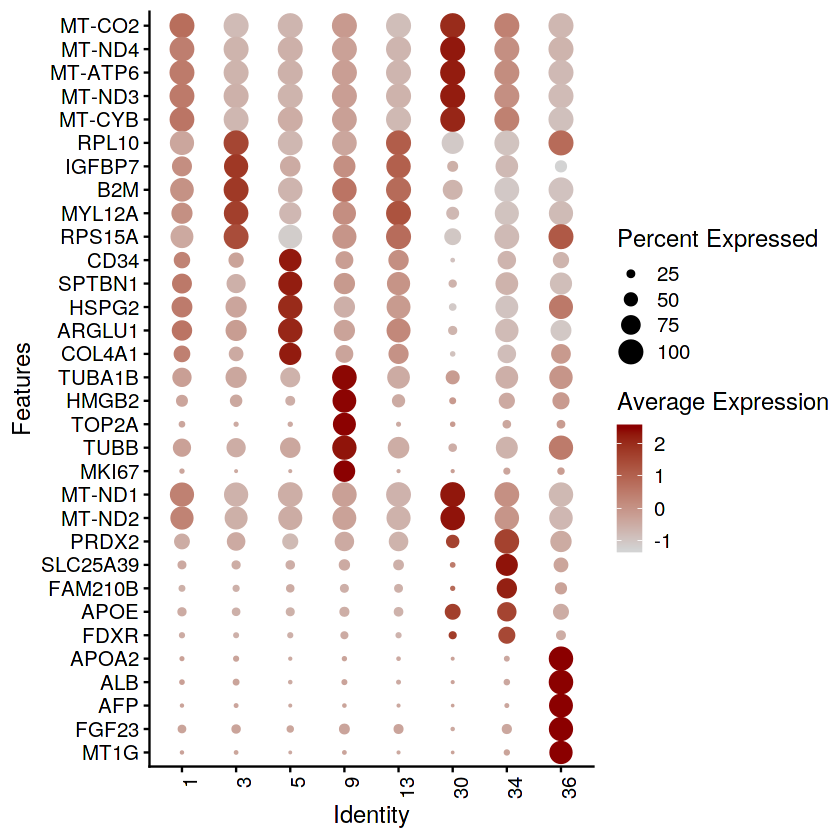

In [41]:
with(env_endothelium, {
    
    Idents(SR) ='seurat_clusters'

    SR.markers.AUC <- FindAllMarkers(SR, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25,
                                    test='roc'
                                    )
    library(dplyr)
    top10.AUC <- SR.markers.AUC %>% group_by(cluster) %>% top_n(n = 5, wt = myAUC)
})

DotPlot(env_endothelium$SR, features = unique(env_endothelium$top10.AUC$gene), group.by='seurat_clusters', cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave('figures/fig5_endothelium/dotplot_clusters.top5auc.8x10.pdf', width=8,height=10)


# Blood

In [29]:
env_blood = new.env()
env_blood$SR = adrenal_whole$SR[,adrenal_whole$SR@meta.data$fate %in% c('HSC_and_immune', 'erythroid')]

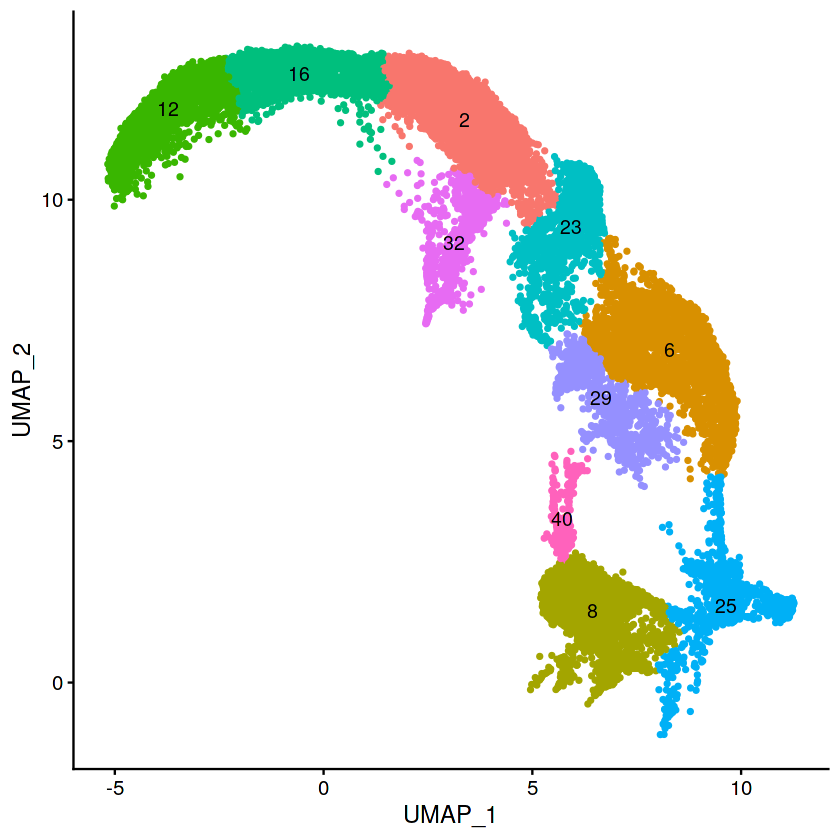

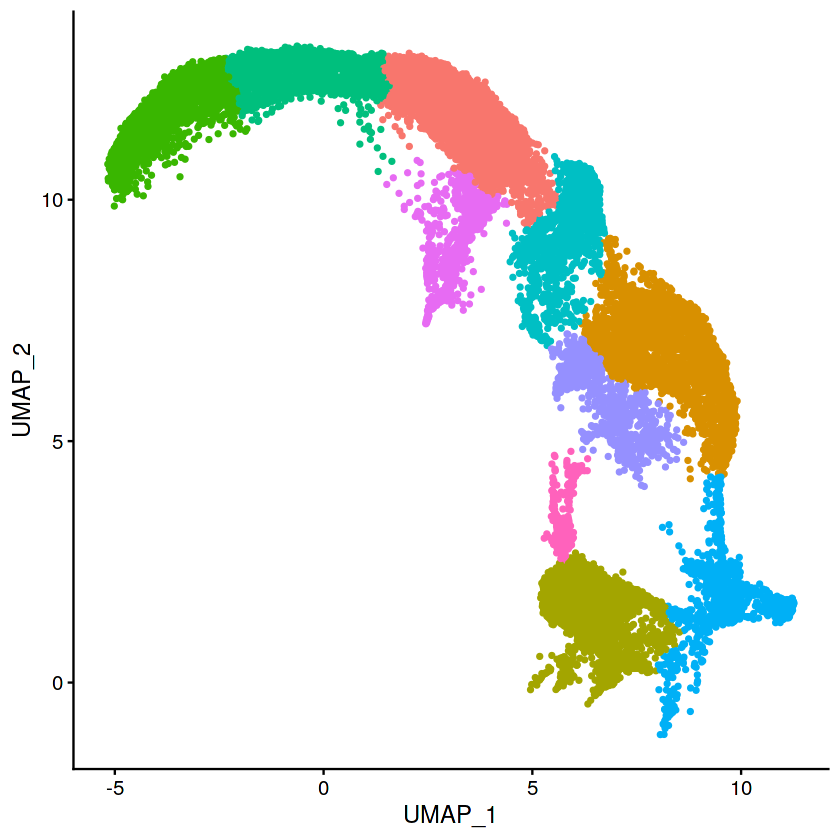

In [30]:
dir.create('figures/fig6_blood')
DimPlot(env_blood$SR, group.by='seurat_clusters', pt.size = 1, label = T)+NoLegend()
ggsave('figures/fig6_blood/007.blood.clusters_labelled.pt1.5x5.square.png', width=5, height=5, dpi=320)
DimPlot(env_blood$SR, group.by='seurat_clusters', pt.size = 1, label = F)+NoLegend()
ggsave('figures/fig6_blood/007.blood.clusters_unlabelled.pt1.5x5.square.png', width=5, height=5, dpi=320)

In [33]:
markers1 = toupper(c('GATA1', 'RGS10', 'SPINK2', 'CYTL1', 'BLVRB', 'FAM8A1', 'UROD', 'HBM', 'CPOX', 'HEMGN', 'ALAS2', 'BPGM', 'SRGN', 'AIF1', 'LAPTM5', 'TYROBP', 'CD74', 'FCER1G', 'HCST'))
#'BM2',

for(marker in markers1){
    print(marker)
    FeaturePlot(env_blood$SR, feature=marker, cols = c("lightgrey", "darkred"), pt.size = 1) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig6_blood/004.blood.marker.',marker,'.png'), width=5, height=5, dpi=320)
}

[1] "GATA1"
[1] "RGS10"
[1] "SPINK2"
[1] "CYTL1"
[1] "BLVRB"
[1] "FAM8A1"
[1] "UROD"
[1] "HBM"
[1] "CPOX"
[1] "HEMGN"
[1] "ALAS2"
[1] "BPGM"
[1] "SRGN"
[1] "AIF1"
[1] "LAPTM5"
[1] "TYROBP"
[1] "CD74"
[1] "FCER1G"
[1] "HCST"


Calculating cluster 2
Calculating cluster 6
Calculating cluster 8
Calculating cluster 12
Calculating cluster 16
Calculating cluster 23
Calculating cluster 25
Calculating cluster 29
Calculating cluster 32
Calculating cluster 40


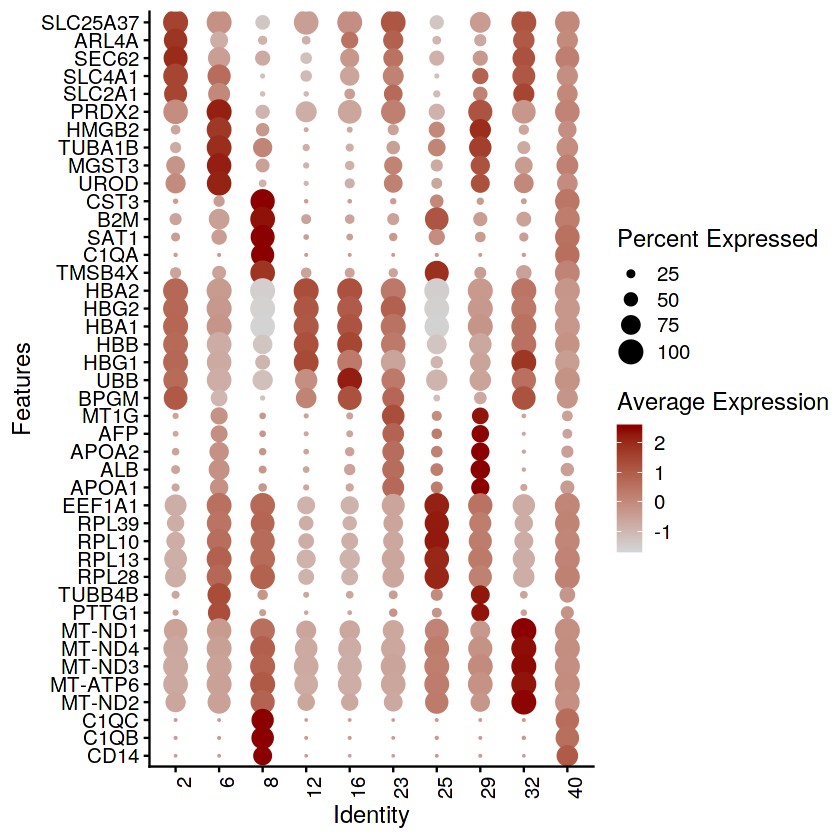

In [42]:
with(env_blood, {
    
    Idents(SR) ='seurat_clusters'

    SR.markers.AUC <- FindAllMarkers(SR, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25,
                                    test='roc'
                                    )
    library(dplyr)
    top10.AUC <- SR.markers.AUC %>% group_by(cluster) %>% top_n(n = 5, wt = myAUC)
})

DotPlot(env_blood$SR, features = unique(env_blood$top10.AUC$gene), group.by='seurat_clusters', cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave('figures/fig6_blood/dotplot_clusters.top5auc.8x10.pdf', width=8,height=10)

When using repel, set xnudge and ynudge to 0 for optimal results
Warning message:
“Transformation introduced infinite values in continuous x-axis”Regressing out nFeature_RNA, percent.mt
Centering and scaling data matrix


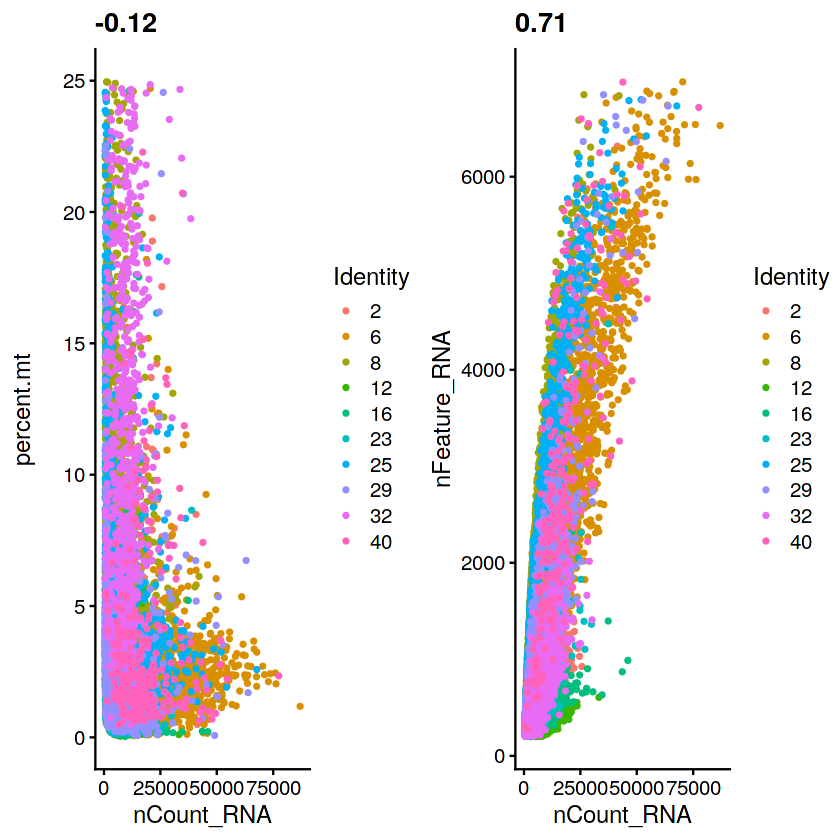

PC_ 1 
Positive:  KCNH2, PCLAF, FAM178B, TMEM14B, S100A6, HMGN5, NME4, HES6, TYMS, TUBB6 
	   EPCAM, MCM7, PKLR, EEF1E1, SYNGR1, TMEM14C, CDC20, CDT1, SRI, CA2 
	   SMIM10, ATP5IF1, AC084033.3, PCNA, MYC, LSM5, ATP5MC1, GINS2, DUT, CENPX 
Negative:  C1QA, C1QC, C1QB, TYROBP, CSF1R, CST3, SRGN, FCGRT, CD163, MRC1 
	   HLA-E, CD74, HLA-B, B2M, MS4A7, MS4A6A, AIF1, RNASET2, CEBPD, FCER1G 
	   TMSB4X, LYVE1, SAT1, LGMN, STAB1, CD68, GRN, MAF, CYBB, CTSD 
PC_ 2 
Positive:  TMCC2, SPARC, STAR, CYP11A1, ITGA1, NFIB, COL4A2, PBX1, CYP17A1, NOSTRIN 
	   SGCE, PLVAP, COL15A1, PEG3, WWTR1, NR5A1, CYP11B1, PAPSS2, SULT2A1, COL4A1 
	   SNCG, DHCR24, NRK, HSPG2, INHA, NR2F1, TBX3, NR2F2, ARHGAP29, MEG8 
Negative:  RPS2, RPL10, RPS23, RPL13, RPS18, RPL3, RPS3A, RPS19, RPLP1, RPS6 
	   RPL37, RPL19, RPS27A, RPL18A, RPL11, RPS3, RPS24, RPS28, RPS12, RPL26 
	   RPL41, RPL32, RPS27, RPL37A, EEF1A1, PTMA, RPS4X, RPS16, RPL13A, RPL39 
PC_ 3 
Positive:  FTL, C1QC, C1QA, C1QB, CD163, CSF1R, MS4A7, FOLR2, CTS

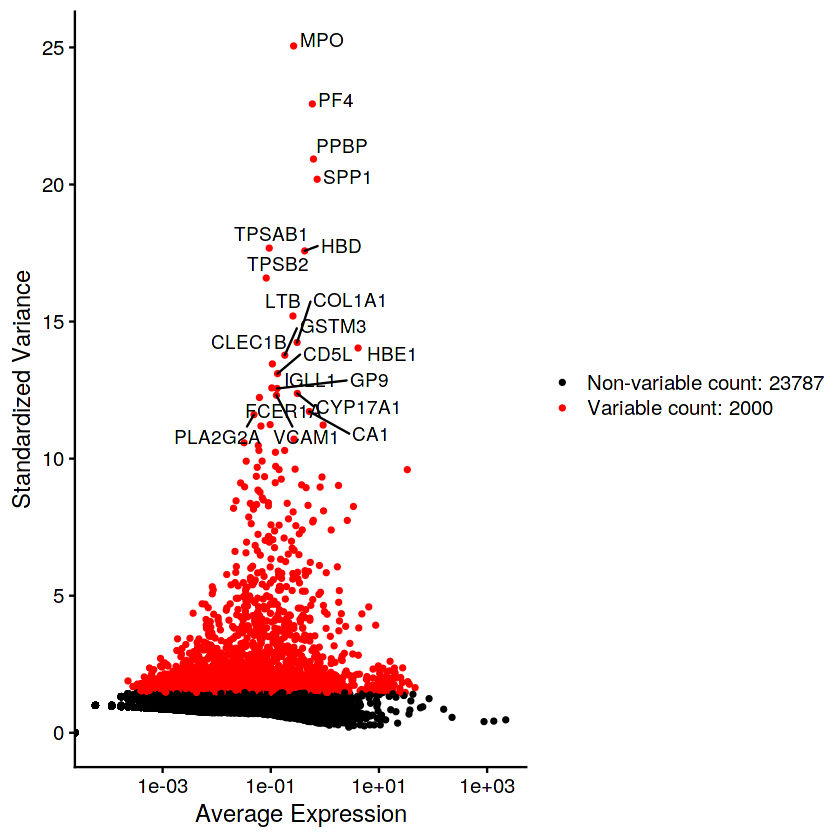

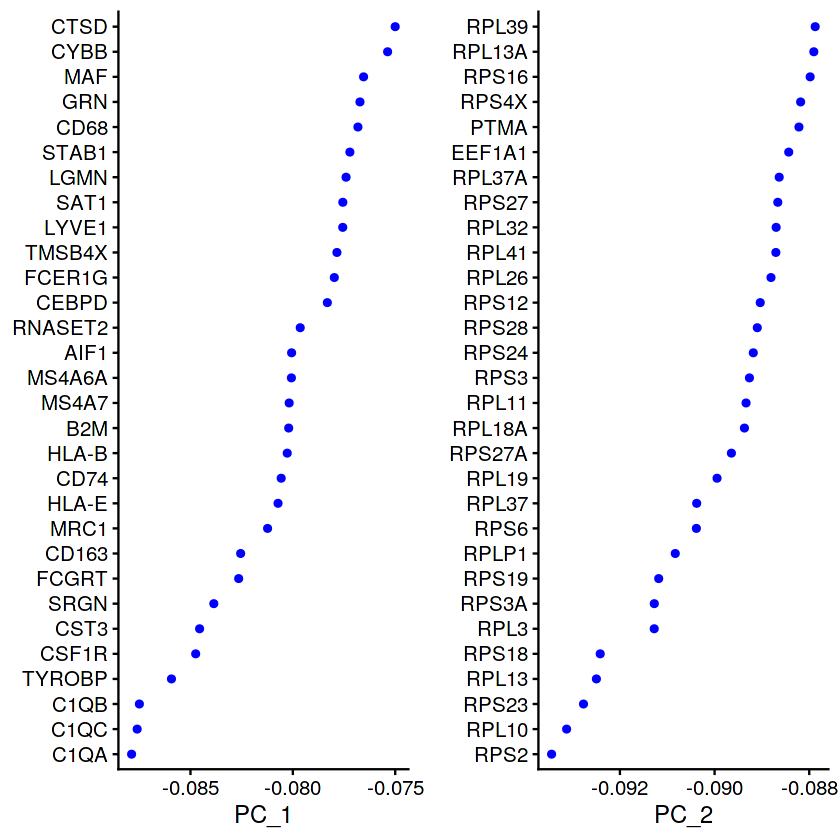

Computing nearest neighbor graph
Computing SNN


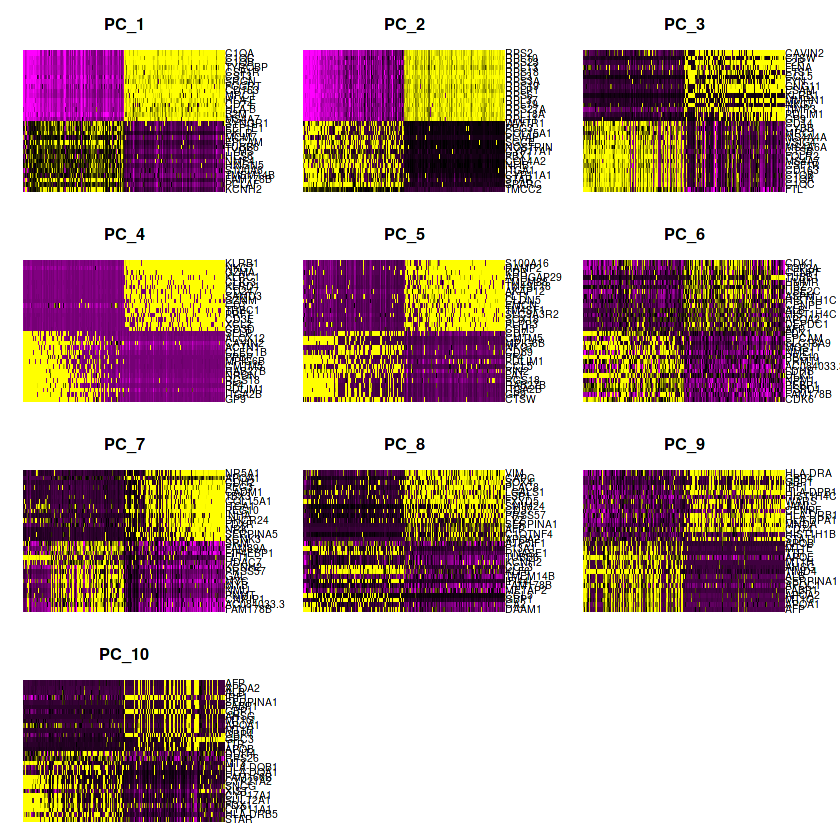

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17481
Number of edges: 544034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9106
Number of communities: 17
Elapsed time: 2 seconds


Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in DoHeatmap(SR, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: BTG1, GADD45A, RPS27L, MT-CO2, MT-ND5, MT-CO3, MT-ND4L, MT-CYB, MT-ND3, MT-ND2, RNF213, TUBB, AHSP, UROD, RRM2, TUBA1B, HMBS, GYPB, GYPA, ST8SIA1, MGST3, PTTG1, PRDX2, MKI67, HBM, HMGB2, UBE2S, SEC62, TENT5C, NCOA4, TRIM58, EIF5, XPO7, ARL4A, R3HDM4, TMEM158, DC

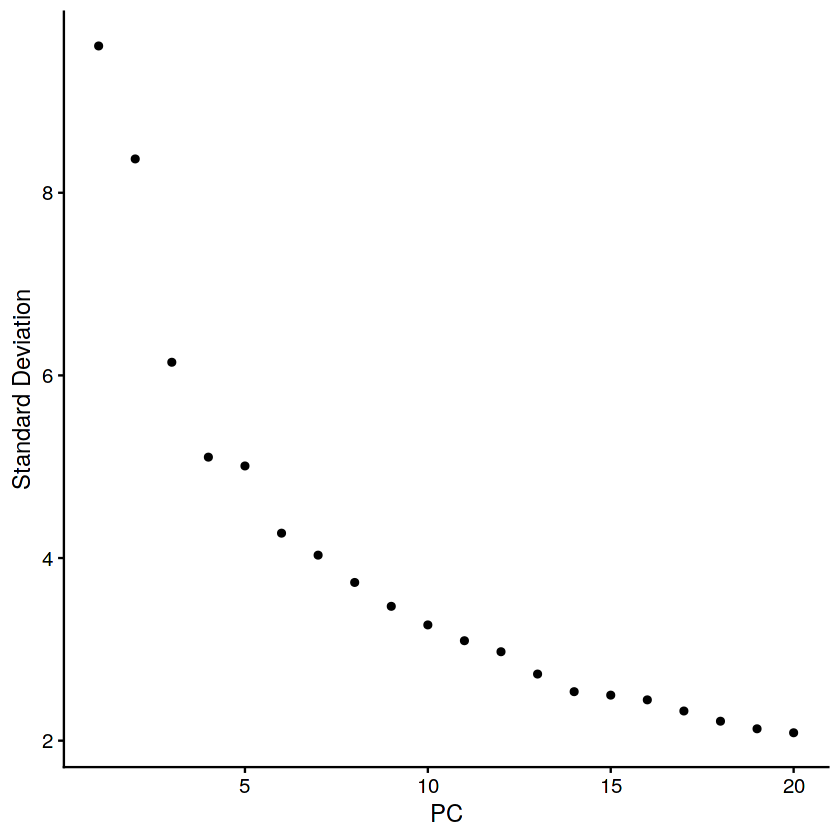

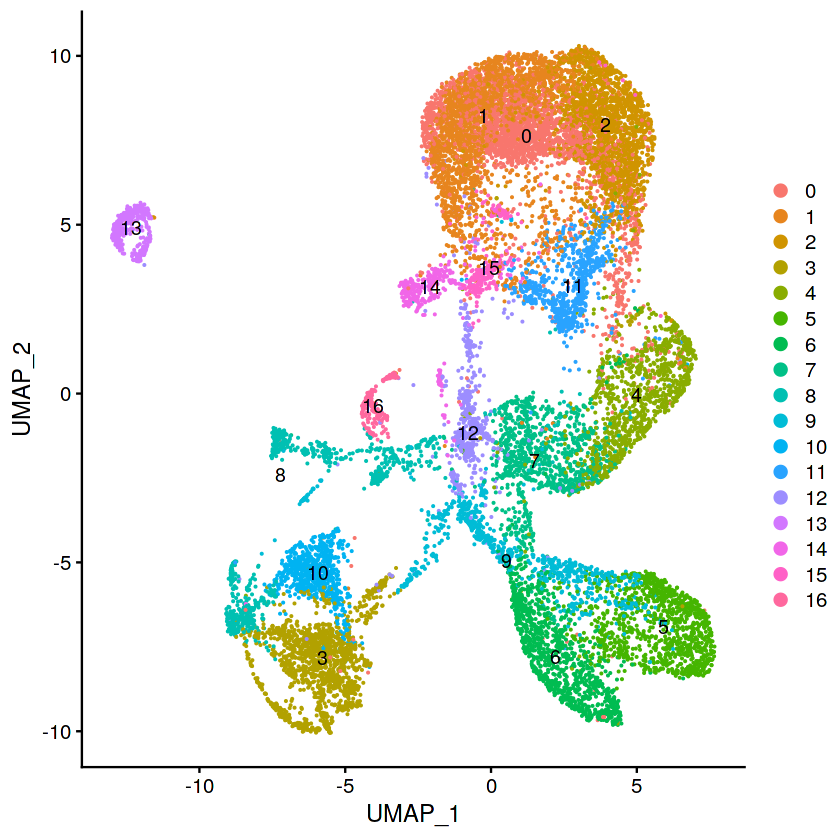

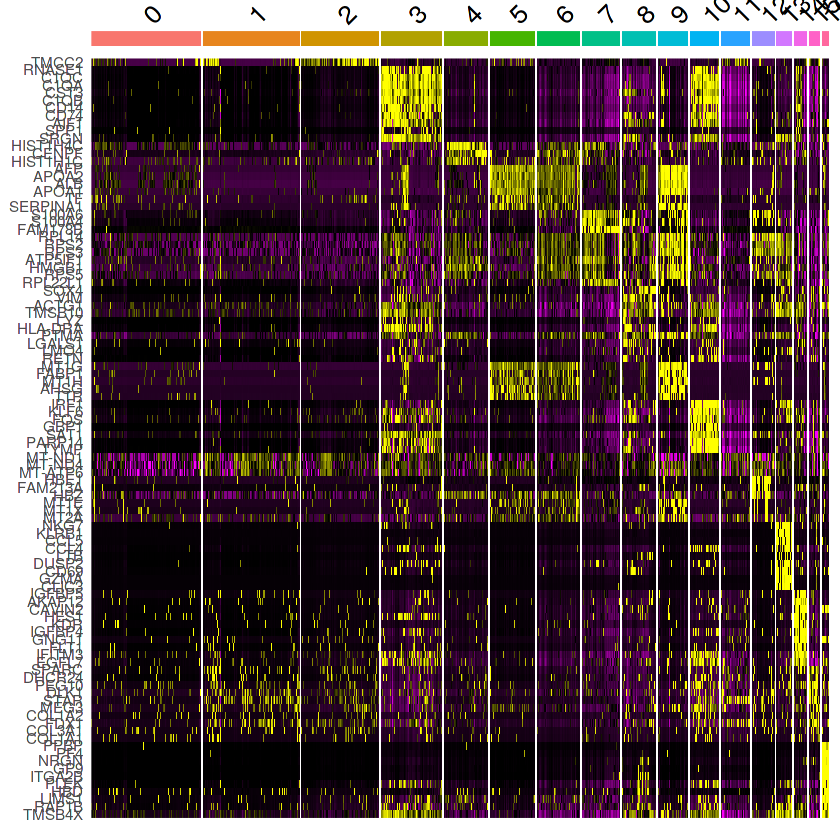

In [27]:
do_seurat_regress(env_blood)

Warning message in dir.create("figures/fig6_blood/reclustered/"):
“'figures/fig6_blood/reclustered' already exists”

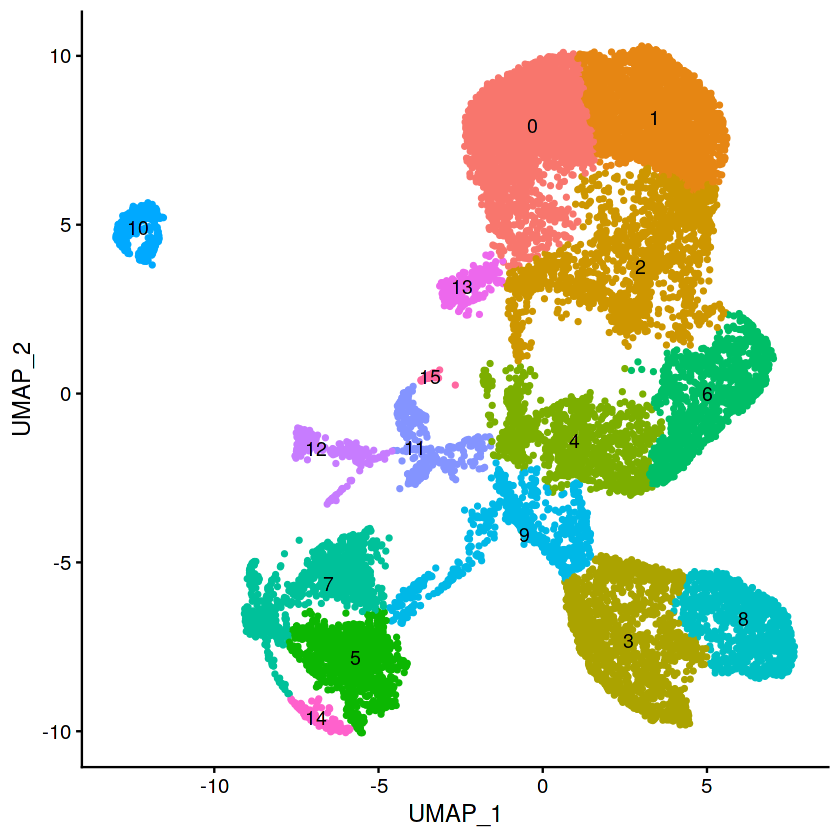

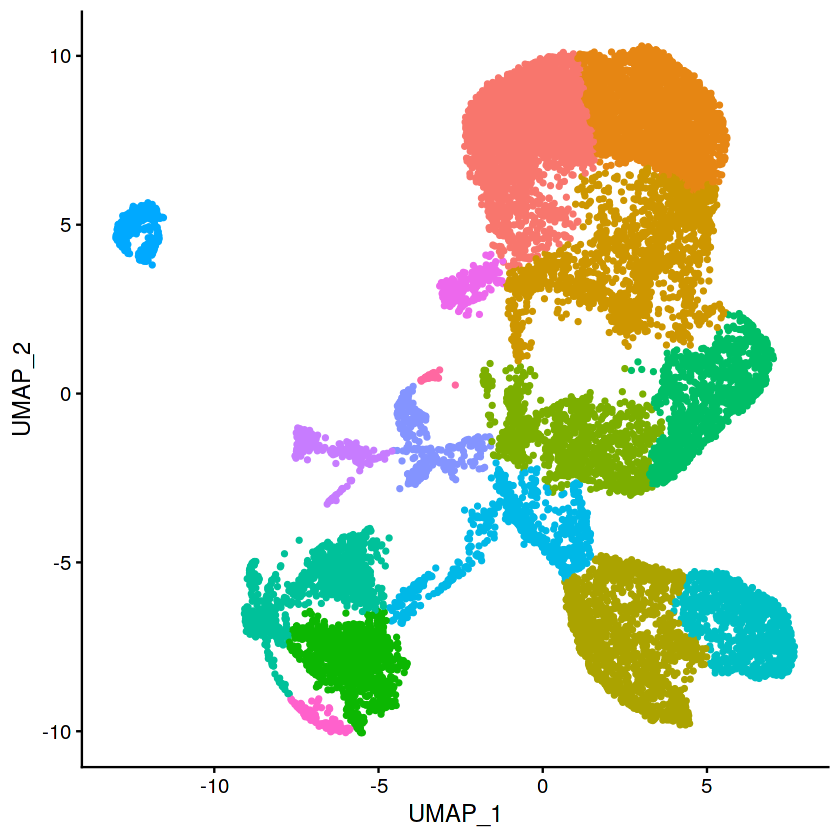

In [33]:
dir.create('figures/fig6_blood/')
dir.create('figures/fig6_blood/reclustered/')
DimPlot(env_blood$SR, group.by='seurat_clusters', pt.size = 1, label = T)+NoLegend()
ggsave('figures/fig6_blood/reclustered/007.blood_recluster.clusters_labelled.pt1.5x5.square.png', width=5, height=5, dpi=320)
DimPlot(env_blood$SR, group.by='seurat_clusters', pt.size = 1, label = F)+NoLegend()
ggsave('figures/fig6_blood/reclustered/007.blood_recluster.clusters_unlabelled.pt1.5x5.square.png', width=5, height=5, dpi=320)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17481
Number of edges: 383287

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9818
Number of communities: 16
Elapsed time: 0 seconds


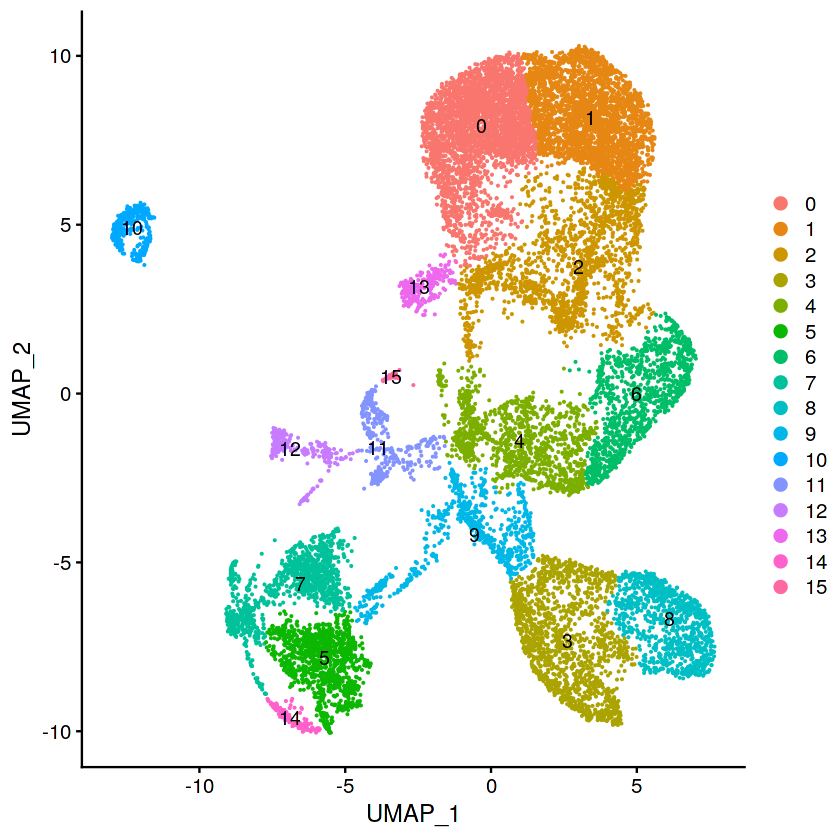

In [32]:
with(env_blood, {
    SR <- FindNeighbors(SR, reduction = "umap", dims=1:2)
    SR <- FindClusters(SR, resolution = 0.1) #, pc_use=1:15
    plot(DimPlot(SR, reduction = "umap", label=T))
})

In [30]:
dir.create('figures/fig6_blood/reclustered')
markers_txt = 'FCN1
LYZ
RETN
S100A8
S100A12
C1QA
C1QB
C1QC
HLA-DRA
STAB1
CD3E
CD24
IL2RB
IL32
KLRC1
LCK
TXK
KLRB1
BLK
CD19
IGHD
RAG2
AZU1
CD34
PRTN3
SPINK2
GP9
HBD
ITGA2B
KIF2A
RUFY1
VCL
CSF2RB
IL1RL1
KIT
LMO4
CNRIP1
CSF2RB
CTNNBL1
GATA1
STAT5A
CD44
CD48
MPO
SFN
HMOX1
SLC48A1
HBZ
'

markers_fig1 = toupper(strsplit(markers_txt, '\n')[[1]])
markers_fig1

for(marker in markers_fig1){
    print(marker)
    tryCatch({
    FeaturePlot(env_blood$SR, feature=marker, cols = c("lightgrey", "darkred")) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig6_blood/reclustered/004.blood_recluster.marker.',marker,'.png'), width=5, height=5, dpi=320)
    },
            error=function(e){print('not found')})
}

Warning message in dir.create("figures/fig6_blood/reclustered"):
“'figures/fig6_blood/reclustered' already exists”

[1] "FCN1"    "LYZ"     "RETN"    "S100A8"  "S100A12" "C1QA"    "C1QB"   
 [8] "C1QC"    "HLA-DRA" "STAB1"   "CD3E"    "CD24"    "IL2RB"   "IL32"   
[15] "KLRC1"   "LCK"     "TXK"     "KLRB1"   "BLK"     "CD19"    "IGHD"   
[22] "RAG2"    "AZU1"    "CD34"    "PRTN3"   "SPINK2"  "GP9"     "HBD"    
[29] "ITGA2B"  "KIF2A"   "RUFY1"   "VCL"     "CSF2RB"  "IL1RL1"  "KIT"    
[36] "LMO4"    "CNRIP1"  "CSF2RB"  "CTNNBL1" "GATA1"   "STAT5A"  "CD44"   
[43] "CD48"    "MPO"     "SFN"     "HMOX1"   "SLC48A1" "HBZ"

[1] "FCN1"
[1] "LYZ"
[1] "RETN"
[1] "S100A8"
[1] "S100A12"
[1] "C1QA"
[1] "C1QB"
[1] "C1QC"
[1] "HLA-DRA"
[1] "STAB1"
[1] "CD3E"
[1] "CD24"
[1] "IL2RB"
[1] "IL32"
[1] "KLRC1"
[1] "LCK"
[1] "TXK"
[1] "KLRB1"
[1] "BLK"
[1] "CD19"
[1] "IGHD"
[1] "RAG2"
[1] "AZU1"
[1] "CD34"
[1] "PRTN3"
[1] "SPINK2"
[1] "GP9"
[1] "HBD"
[1] "ITGA2B"
[1] "KIF2A"
[1] "RUFY1"
[1] "VCL"
[1] "CSF2RB"
[1] "IL1RL1"
[1] "KIT"
[1] "LMO4"
[1] "CNRIP1"
[1] "CSF2RB"
[1] "CTNNBL1"
[1] "GATA1"
[1] "STAT5A"
[1] "CD44"
[1] "CD48"
[1] "MPO"
[1] "SFN"
[1] "HMOX1"
[1] "SLC48A1"
[1] "HBZ"


In [46]:
SR = env_6tp$SR[,sample(1:ncol(env_6tp$SR), 10000)]

dir.create('figures/pagoda/')

library(pagoda2)
library(igraph)

p2 <- basicP2proc(SR@assays$RNA@counts, n.cores = 1)

go.env <- p2.generate.human.go(p2)


p2$clusters$PCA$seurat_cluster = as.factor(SR@meta.data$seurat_cluster)
names(p2$clusters$PCA$seurat_cluster) = rownames(SR@meta.data)

p2$embeddings$PCA$tSNE = as.matrix(SR@reductions$umap@cell.embeddings)
    #p2$embeddings$PCA = as.matrix(p2$embeddings$PCA@cell.embeddings)

p2$clusters$PCA$timepoint = as.factor(SR@meta.data$orig.ident)
names(p2$clusters$PCA$timepoint) = rownames(SR@meta.data)

p2$embeddings$PCA$tSNE = as.matrix(SR@reductions$umap@cell.embeddings)
    #p2$embeddings$PCA = as.matrix(p2$embeddings$PCA@cell.embeddings)


n.cores=1

cat('Calculating hdea...\n')
hdea <- p2$getHierarchicalDiffExpressionAspects(type='PCA',clusterName='multilevel',z.threshold=3, n.cores = n.cores)

extraWebMetadata = NULL
app.title = 'adrenal_sr_10K'
metadata.forweb <- list();
metadata.forweb$timepoint <- p2.metadata.from.factor(p2$clusters$PCA$timepoint,displayname='timepoint')
metadata.forweb$leiden <- p2.metadata.from.factor(p2$clusters$PCA$seurat_cluster,displayname='seurat_cluster')
metadata.forweb$multilevel <- p2.metadata.from.factor(p2$clusters$PCA$multilevel,displayname='multilevel')
metadata.forweb <- c(metadata.forweb, extraWebMetadata)
genesets <- hierDiffToGenesets(hdea)
appmetadata = list(apptitle=app.title)
cat('Making KNN graph...\n')
#p2$makeGeneKnnGraph(n.cores=n.cores)
p2w = make.p2.app(p2, additionalMetadata = metadata.forweb, geneSets = genesets, dendrogramCellGroups = p2$clusters$PCA$multilevel, show.clusters=F, appmetadata = appmetadata)

p2w$serializeToStaticFast(binary.filename = 'figures/pagoda/adrenal.sampled_10K_cells.bin')

Warning message in dir.create("figures/pagoda/"):
“'figures/pagoda' already exists”

10000 cells, 24623 genes; normalizing ... using plain model winsorizing ... log scale ... done.
calculating variance fit ... using gam 2308 overdispersed genes ... 2308 persisting ... done.
running PCA using 3000 OD genes .... done
Estimating embeddings.
running tSNE using 1 cores:
 - point 10000 of 10000


Calculating hdea...
using multilevel  clustering for PCA space
Making KNN graph...


NULL

In [47]:
rm(p2, p2w)
gc()

used       (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells    4458999  238.2   35238697  1882.0   38032761  2031.2
Vcells 1221570879 9319.9 3044721643 23229.4 5649214847 43100.1

In [63]:
unique(env_6tp$SR@meta.data$orig.ident)
unique(env_6tp$SR@meta.data$timepoint)

[1] "R30_w85"   "R39_w95"   "R43_w60"   "R48a_w145" "R48b_w120" "R48c_w85" 
[7] "R53a_w95"  "R53b_w115" "R53c_w95"

[1] "8"  "9"  "6"  "14" "12" "11"

In [60]:
env_6tp$SR@meta.data$orig.ident2 = env_6tp$SR@meta.data$orig.ident
unique(env_6tp$SR@meta.data$orig.ident)
env_6tp$SR@meta.data$orig.ident2[env_6tp$SR@meta.data$orig.ident2=='R53a_w00'] = 'R53a_w95'
env_6tp$SR@meta.data$orig.ident2[env_6tp$SR@meta.data$orig.ident2=='R53b_w00'] = 'R53b_w115'
env_6tp$SR@meta.data$orig.ident2[env_6tp$SR@meta.data$orig.ident2=='R53c_w00'] = 'R53c_w95'
env_6tp$SR@meta.data$timepoint = sapply(strsplit(env_6tp$SR@meta.data$orig.ident2, '_'), `[`, 2)
env_6tp$SR@meta.data$orig.ident = env_6tp$SR@meta.data$orig.ident2
env_6tp$SR@meta.data$orig.ident2 = NULL

[1] "R30_w85"   "R39_w95"   "R43_w60"   "R48a_w145" "R48b_w120" "R48c_w85" 
[7] "R53a_w95"  "R53b_w115" "R53c_w95"

In [62]:
env_6tp$SR@meta.data$timepoint = substr(env_6tp$SR@meta.data$timepoint,1,nchar(env_6tp$SR@meta.data$timepoint)-1)
env_6tp$SR@meta.data$timepoint = gsub('w','',env_6tp$SR@meta.data$timepoint)

orig.ident nCount_RNA nFeature_RNA percent.mt
R30_w8.5_AAACCCAAGAGATGCC R30_w85    19142      4377          9.011598 
R30_w8.5_AAACCCAAGATTGTGA R30_w85    14516      3873          2.817581 
R30_w8.5_AAACCCAAGGATACGC R30_w85     8325      2598          4.804805 
R30_w8.5_AAACCCACAAAGGCTG R30_w85     3112      1654          2.345758 
R30_w8.5_AAACCCACACGCTGTG R30_w85    11905      3216         16.858463 
R30_w8.5_AAACCCACAGAGGCAT R30_w85    16540      4460          6.958888 
                          RNA_snn_res.0.5 seurat_clusters RNA_snn_res.0.3
R30_w8.5_AAACCCAAGAGATGCC 1               0               0              
R30_w8.5_AAACCCAAGATTGTGA 14              20              20             
R30_w8.5_AAACCCAAGGATACGC 2               11              11             
R30_w8.5_AAACCCACAAAGGCTG 0               3               3              
R30_w8.5_AAACCCACACGCTGTG 1               28              28             
R30_w8.5_AAACCCACAGAGGCAT 11              14              14             
                          RNA_snn_res.1.5 fate        timepoint
R30_w8.5_AAACCCAAGAGATGCC 60              cortex      8        
R30_w8.5_AAACCCAAGATTGTGA 37              kidney      8        
R30_w8.5_AAACCCAAGGATACGC 28              mesenchyme  8        
R30_w8.5_AAACCCACAAAGGCTG 12              endothelium 8        
R30_w8.5_AAACCCACACGCTGTG 23              cortex      8        
R30_w8.5_AAACCCACAGAGGCAT 0               cortex      8

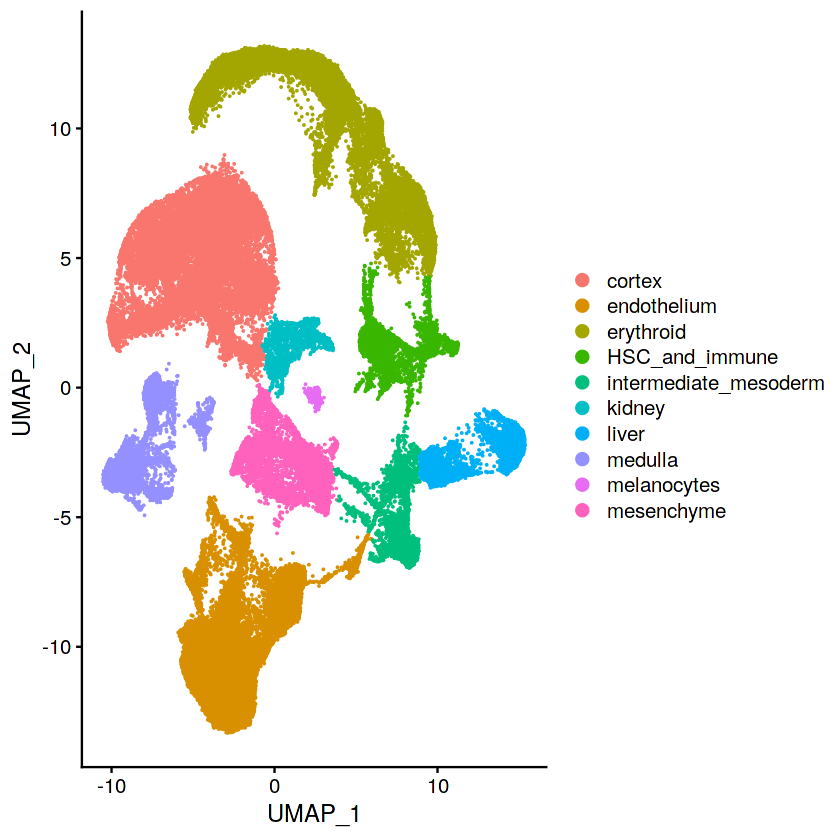

In [64]:
head(env_6tp$SR@meta.data)
SR = env_6tp$SR
SR@meta.data$fate[SR@meta.data$fate=='blood2'] = 'erythroid'
SR@meta.data$fate[SR@meta.data$fate=='blood1'] = 'HSC_and_immune'
SR@meta.data$fate[SR@meta.data$fate=='progenitors'] = 'intermediate_mesoderm'
SR@meta.data$fate[SR@meta.data$fate=='other'] = 'melanocytes'
DimPlot(SR, group.by = 'fate')

saveRDS(SR, file='/mnt/data/artem/rdata/Adrenal/adrenal.human.seurat.rds')

In [ ]:
DimPlot(SR, group.by = 'timepoint')
